In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from statistics import mean, stdev
from sklearn import preprocessing

In [3]:
# Load dataset
data = pd.read_csv("brain_stroke.csv")
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Check For Missing Values

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Check Data Types of All Attributes

In [5]:
# Check data types of each column
print(data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [6]:
# 2. Encoding categorical variables
label_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [7]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [8]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
min_values = data[numerical_cols].min()
max_values = data[numerical_cols].max()

# Calculate the range
range_values = max_values - min_values

# Combine results into a DataFrame for better visualization
range_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Range': range_values
})

print(range_df)

                     Min     Max   Range
age                 0.08   82.00   81.92
hypertension        0.00    1.00    1.00
heart_disease       0.00    1.00    1.00
avg_glucose_level  55.12  271.74  216.62
bmi                14.00   48.90   34.90
stroke              0.00    1.00    1.00


In [9]:
# 3. Feature Scaling (for continuous variables)
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])


Descriptive statistics for numerical features:
            gender           age  hypertension  heart_disease  ever_married  \
count  4981.000000  4.981000e+03   4981.000000    4981.000000   4981.000000   
mean      0.416382  2.853012e-18      0.096165       0.055210      0.658502   
std       0.493008  1.000100e+00      0.294848       0.228412      0.474260   
min       0.000000 -1.912575e+00      0.000000       0.000000      0.000000   
25%       0.000000 -8.128627e-01      0.000000       0.000000      0.000000   
50%       0.000000  6.973111e-02      0.000000       0.000000      1.000000   
75%       1.000000  7.758062e-01      0.000000       0.000000      1.000000   
max       1.000000  1.702530e+00      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level           bmi  \
count  4981.000000     4981.000000       4.981000e+03  4.981000e+03   
mean      1.302349        0.508332       1.169735e-16 -6.219567e-16   
std       0.860170        0.

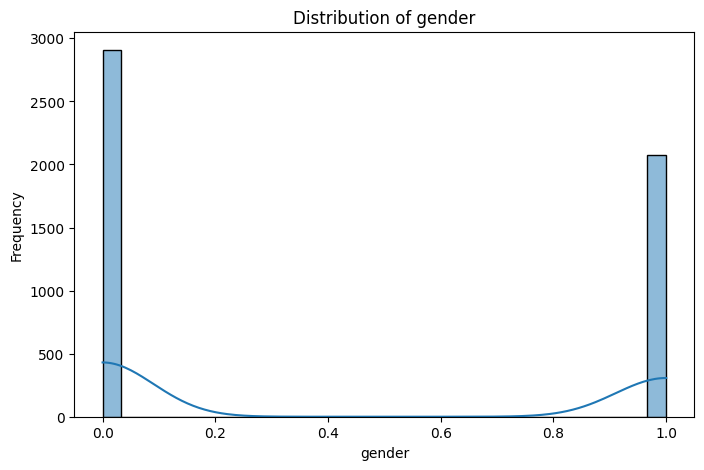

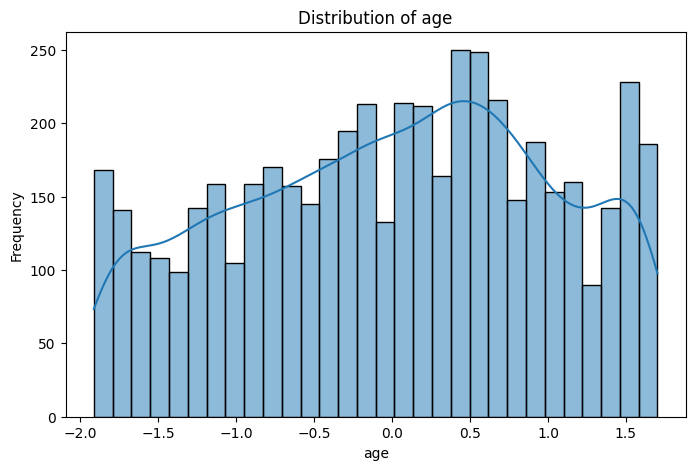

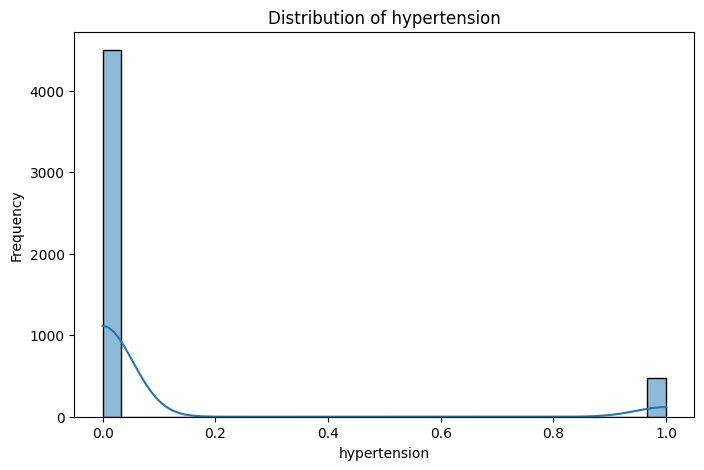

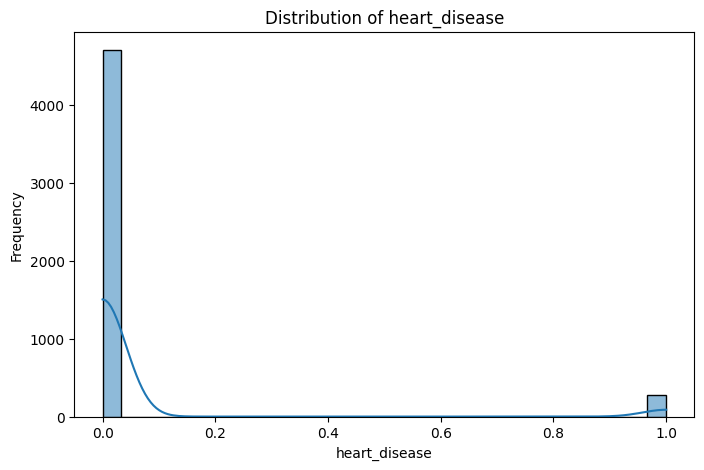

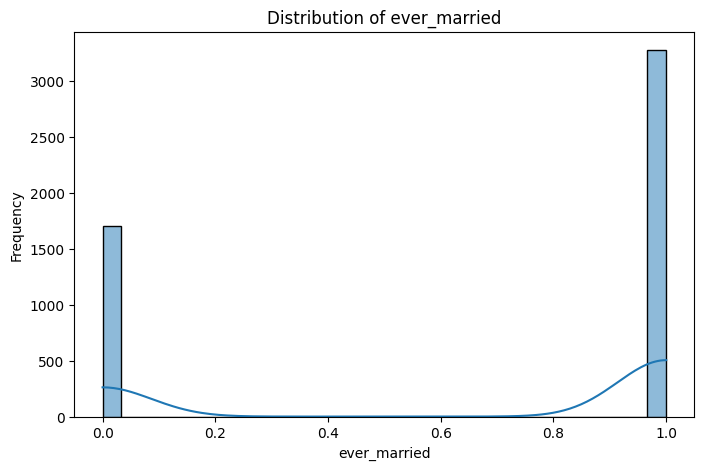

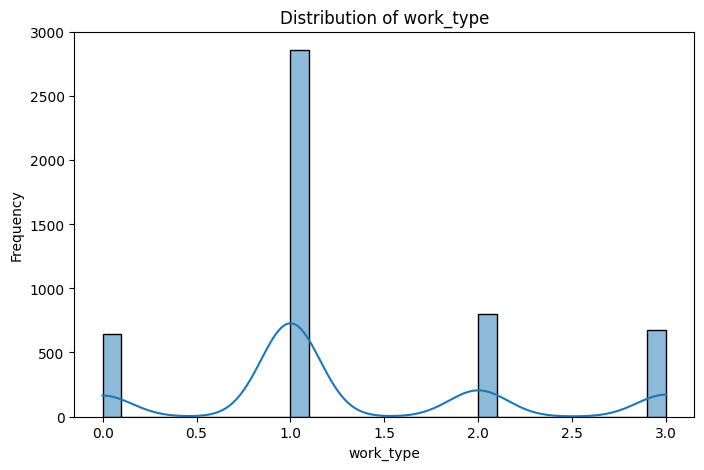

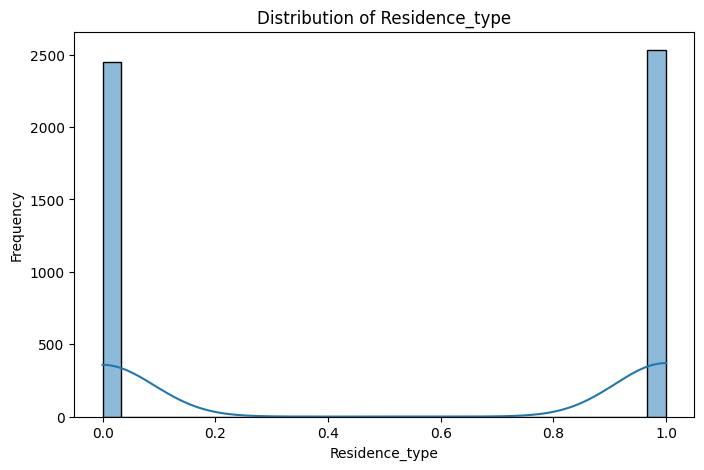

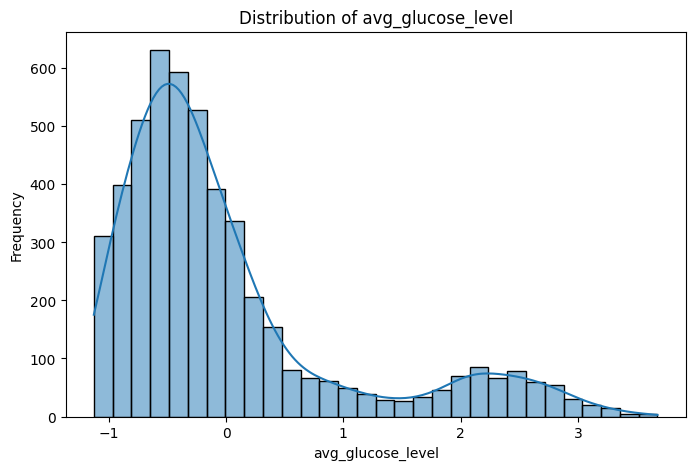

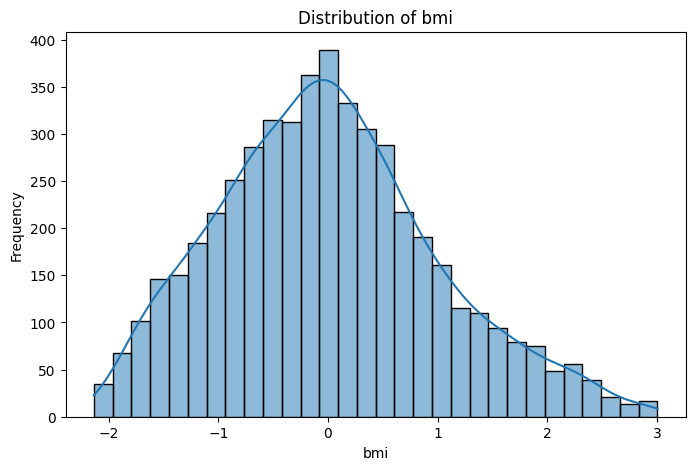

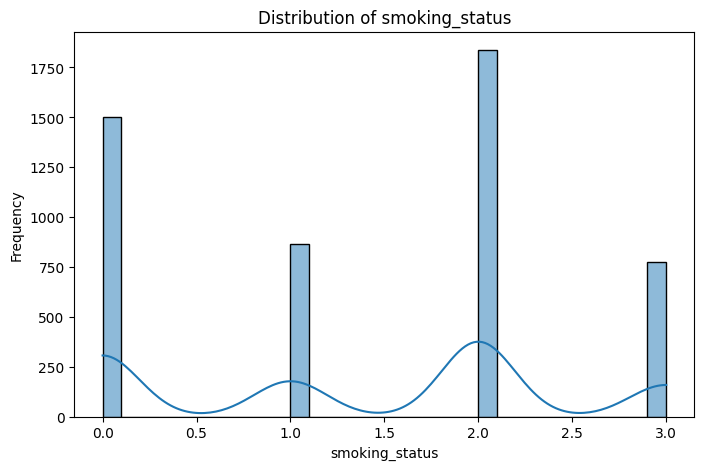

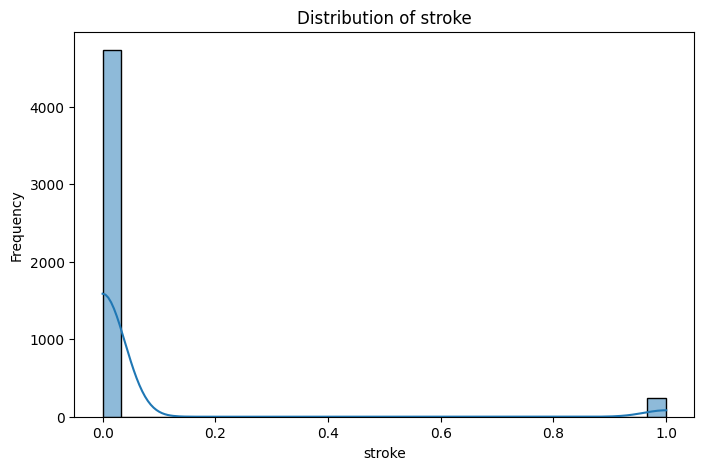

In [9]:
# Descriptive statistics for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Descriptive statistics for numerical features:")
print(data[numerical_cols].describe())

# Visualizing distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


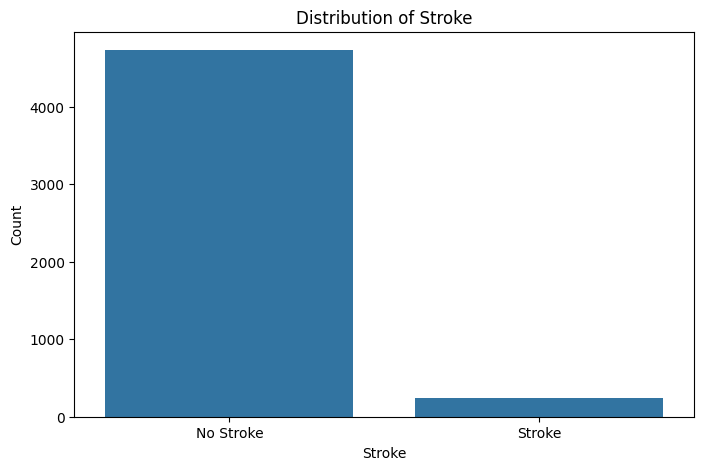

In [10]:
# Check for imbalance in the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=data)
plt.title("Distribution of Stroke")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

In [11]:

X = data.drop('stroke', axis=1)
y = data['stroke']


In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.040584,0,1,1,1,1,2.723411,1.193238,1
1,1,1.614270,0,1,1,1,0,-0.000523,0.589390,2
2,0,0.246250,0,0,1,1,1,1.448529,0.869222,3
3,0,1.570141,1,0,1,2,0,1.512650,-0.662492,2
4,1,1.658400,0,0,1,1,1,1.780895,0.073909,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,-0.106788,0,0,0,1,0,-0.794162,0.191733,1
4977,1,-0.150917,0,0,1,1,1,1.890500,0.383197,3
4978,0,0.069731,1,0,1,0,0,-0.242364,0.486294,3
4979,1,-0.150917,0,0,1,1,0,-0.488199,0.221189,3


**Logistic Regression With Stratified Cross Validation**

In [ ]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
lr = LogisticRegression()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    lr.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(lr.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))





List of possible accuracy: [0.9498997995991983, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9518072289156626, 0.9518072289156626]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.97991967871486 %

Overall Accuracy: 95.02108634940564 %

Standard Deviation is: 0.0008419430046900221


**Train Test Split Without Stratification**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



**Logistic Regression With Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression
lr = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid_search =  GridSearchCV(estimator=lr, param_grid=grid, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.9512334894122579
Test Accuracy: 0.9478260869565217


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

**K Nearest Neighbor Classifier With Stratified Cross Validation**

In [ ]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
kc = KNeighborsClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    kc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(kc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))




List of possible accuracy: [0.9438877755511023, 0.9457831325301205, 0.9477911646586346, 0.9497991967871486, 0.9497991967871486, 0.9457831325301205, 0.9518072289156626, 0.9497991967871486, 0.9437751004016064, 0.9457831325301205]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.37751004016064 %

Overall Accuracy: 94.74008257478813 %

Standard Deviation is: 0.002792121938604873


**K Nearest Neighbors With Grid Search**

In [ ]:

# K-Nearest Neighbors
kc = KNeighborsClassifier()
k_range = list(range(1, 31))
grid = dict()
grid['n_neighbors'] = [10, 50, 100, 500]
grid['weights']= ['uniform', 'distance']
grid['metric']= ['euclidean', 'manhattan']
grid = GridSearchCV(kc, param_grid = grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# Evaluate the best model on the test data
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best Accuracy: 0.9512334090834239
Test Accuracy: 0.9471571906354515


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Random Forest Classifier With Stratified Cross Validation**

In [ ]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
Rc = RandomForestClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    Rc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(Rc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))





List of possible accuracy: [0.9478957915831663, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9497991967871486, 0.9477911646586346, 0.9477911646586346, 0.9518072289156626, 0.9417670682730924]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.17670682730925 %

Overall Accuracy: 94.86048402024933 %

Standard Deviation is: 0.0027073919884313792


**Random Forest With Grid Search**


In [ ]:
# Random Forest
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print("Best Hyperparameters:", model_grid.best_params_)
print("Best Accuracy:", model_grid.best_score_)

# Evaluate the best model on the test data
best_model = model_grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.951 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.951 total time=   0.3s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.951 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.951 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.951 total time=   0.7s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.951 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.951 total time=   1.0s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.951 total time=   1.0s
[CV 3/3] END max_depth=3, max_fea

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'max_depth': 7, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 500}
Best Accuracy: 0.9518072289156626
Test Accuracy: 0.9471571906354515


**Gradient Boosting Classifier With Stratified Cross Validation**

In [ ]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
Gc = GradientBoostingClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    Gc.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(Gc.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))



List of possible accuracy: [0.9478957915831663, 0.9457831325301205, 0.9477911646586346, 0.9457831325301205, 0.9518072289156626, 0.9457831325301205, 0.9497991967871486, 0.9457831325301205, 0.9497991967871486, 0.9457831325301205]

Maximum Accuracy That can be obtained from this model is: 95.18072289156626 %

Minimum Accuracy: 94.57831325301204 %

Overall Accuracy: 94.76008241382362 %

Standard Deviation is: 0.002211152916388342


**Gradient Boosting Classifier with Grid Search**

In [ ]:

# Gradient Boosting Classifier
model = GradientBoostingClassifier()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
grid['min_samples_leaf'] = [1, 2, 4]

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,cv = 5)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 0.951520433458169
Test Accuracy: 0.9478260869565217


**Decision Tree Classifier With Stratified Cross Validation**

In [ ]:
# Feature Scaling for Input Features
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create Classifier Object
DT = DecisionTreeClassifier()

# Create StratifiedKFold Object
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

# Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Fit the model on the training fold
    DT.fit(X_train_fold, y_train_fold)

    # Append the accuracy of the fold
    lst_accu_stratified.append(DT.score(X_test_fold, y_test_fold))

# Print the output for cross-validation
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))



List of possible accuracy: [0.8997995991983968, 0.8975903614457831, 0.9196787148594378, 0.9056224899598394, 0.8835341365461847, 0.9036144578313253, 0.9076305220883534, 0.9036144578313253, 0.9116465863453815, 0.9016064257028112]

Maximum Accuracy That can be obtained from this model is: 91.96787148594377 %

Minimum Accuracy: 88.35341365461848 %

Overall Accuracy: 90.34337751808839 %

Standard Deviation is: 0.009431061710414036


**Decision Tree With Grid Search**

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}
DT = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=DT,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
# Decision Tree Classifier

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9512334894122579
Test Accuracy: 0.9478260869565217


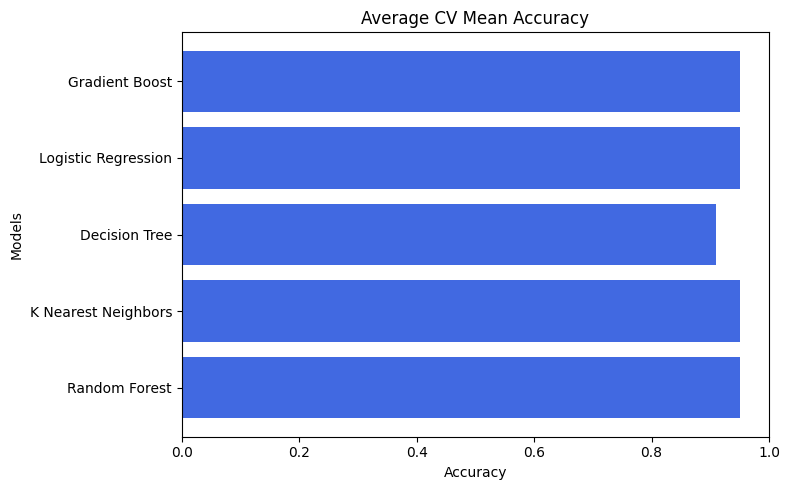

In [ ]:
import matplotlib.pyplot as plt

# Define the data
models = ['Random Forest', 'K Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Gradient Boost']
accuracy = [0.95, 0.95, 0.91, 0.95, 0.95]

plt.figure(figsize=(8, 5))
plt.barh(models, accuracy, color='royalblue')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Average CV Mean Accuracy')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
